<a href="https://colab.research.google.com/github/uirasiqueira/Customer_data/blob/main/K_Means_CustomersData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means clustering for customer Data

In [3]:
import numpy as np #Linear algebra
import pandas as pd #data processing
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt #data visualization

import plotly as py
import plotly.graph_objs as go

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
import warnings
warnings.filterwarnings('ignore')

## Data exploration

In [7]:
df = pd.read_csv('Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Check for null values

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

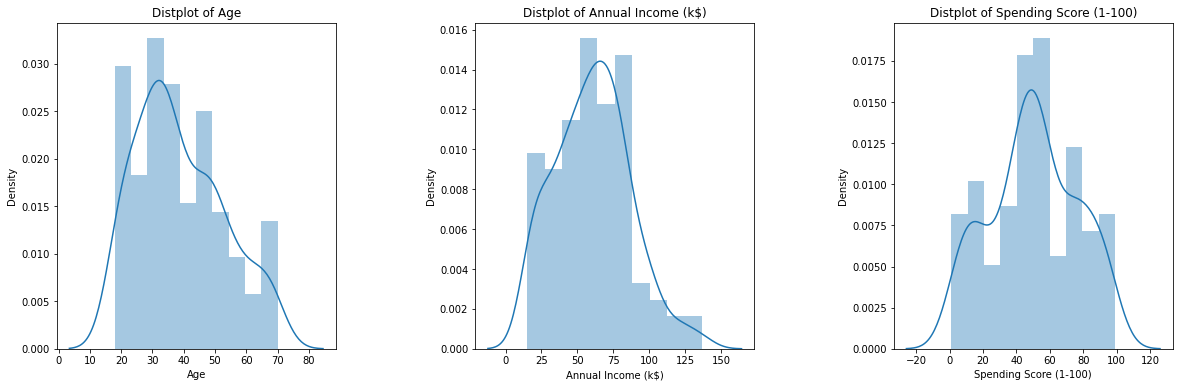

In [13]:
plt.figure(1, figsize= (20,6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 10)
    plt.title(f'Distplot of {x}')
plt.show()

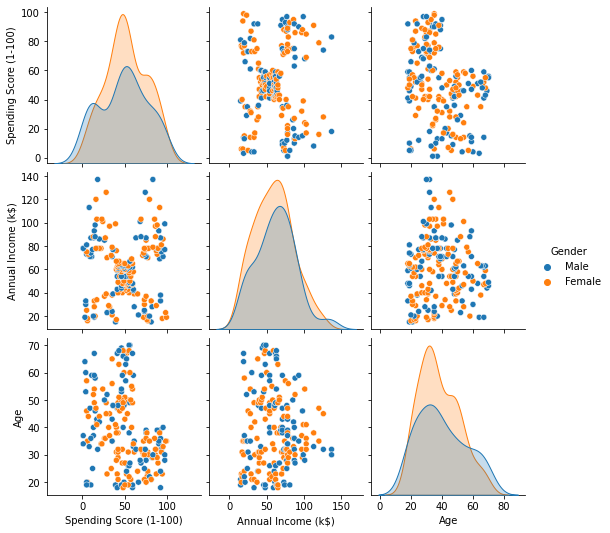

In [14]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = 'Gender')

### Transforming varival categorichal gender in Numerical (Data vectorization)

In [15]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [16]:
x = df['Gender'].values

In [17]:
from sklearn.preprocessing import LabelEncoder #Transform variable categorical in numerical

label_en = LabelEncoder()
x = label_en.fit_transform(x)

In [18]:
x, np.unique(x)

(array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1]), array([0, 1]))

### Clustering based on Age and Spending score

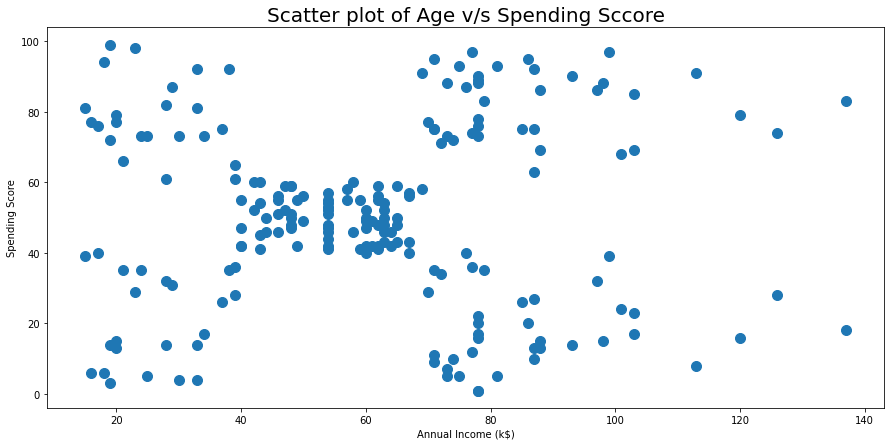

In [19]:
plt.figure(1, figsize = (15,7))
plt.title('Scatter plot of Age v/s Spending Sccore', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df, s = 100)

### Elbow method - Finding number of K (clusters)

In [20]:
x1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
inertia = []
for n in range(1,10):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, 
                        tol =0.0001, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(x1)
    inertia.append(algorithm.inertia_) #Inertia measures how well a dataset was clustered by K-Means



#### n_cluster: int; default(8) = Number of cluster to form as well as the number of centroids;
#### init: k-means++ = selects initial cluster center for k-mean clustering in a smart way to speed up convergence (the are more parameters...check);
#### n_init = number of time the k-means algorithm will be run with different centroids seeds;
#### max_iter = maximum number of interations of the k-means algorithm for a single run;
#### tol = Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of 2 consecutive iterations to declare convergence;
#### random_state = Determine random number generation for centroid initialization;
#### algorithm = efficient on some datasets

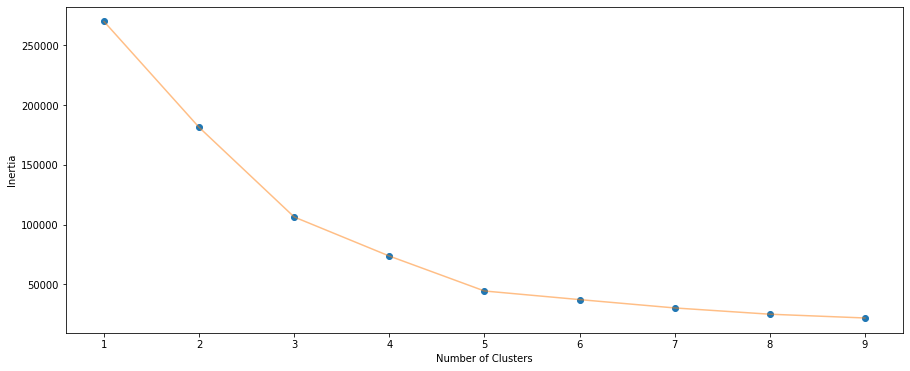

In [21]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,10), inertia, 'o')
plt.plot(np.arange(1,10), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

### Applying KMeans for k = 5

In [22]:
algorithm = KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan')
algorithm.fit(x1)

KMeans(algorithm='elkan', n_clusters=5, random_state=111)

In [23]:
labels = algorithm.labels_

In [24]:
print(algorithm.labels_)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 1 4 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 3 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 3 2 1 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3
 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2]


In [25]:
print(algorithm.cluster_centers_)

[[25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [26]:
centroids1 = algorithm.cluster_centers_ #to show the output just print

#### 1th way to plot chart

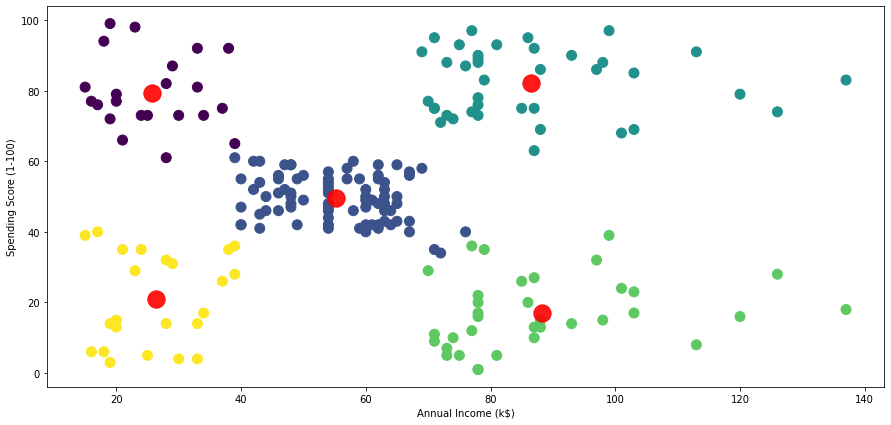

In [27]:
plt.figure(1, figsize = (15,7))
plt.scatter( x = 'Annual Income (k$)', y='Spending Score (1-100)', data = df, c = labels, s=100)
plt.scatter(x = centroids1[: , 0] , y = centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.9)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()

#### 2th way to plot chart

In [28]:
df_cluster = x1.copy()
df_cluster['Cluster'] = algorithm.fit_predict(x1) #add new column (Cluster)

In [29]:
df_cluster

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,3
197,126,74,2
198,137,18,3


In [30]:
Color = ['red', 'blue', 'black', 'gold', 'navy']
df_cluster['Color'] = df_cluster['Cluster'].map(lambda p:Color[p])

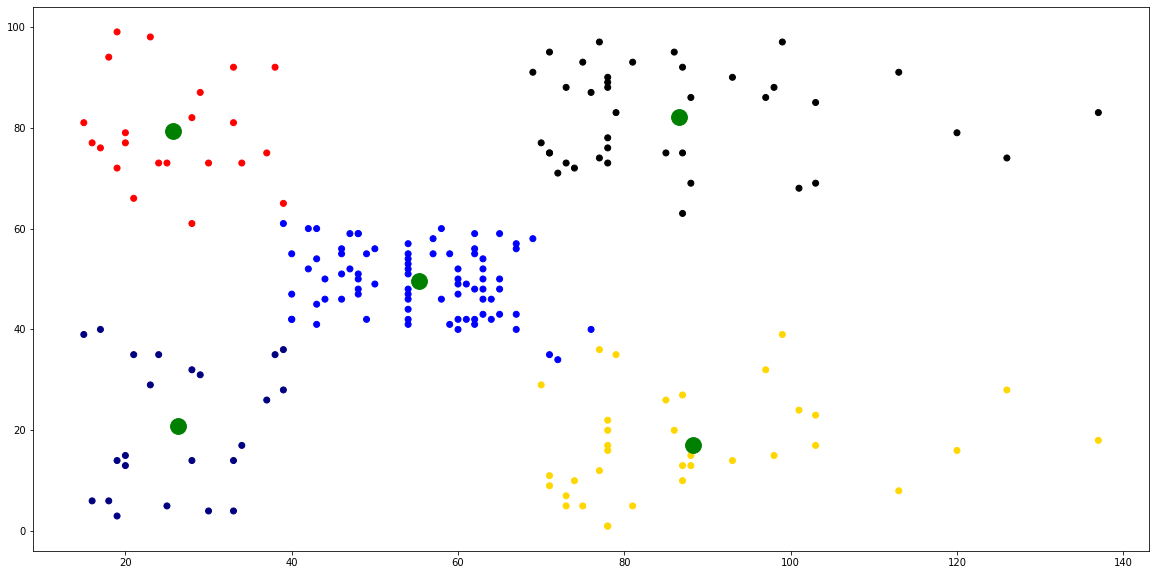

In [31]:
plt.figure(figsize=(20,10))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
           c=df_cluster['Color'])
plt.scatter(centroids1[:,0], centroids1[:,1], c='green', s=250)
plt.show()

### Evaluating the cluster (Silhouette score)

#### Silhouette score vary between -1 and 1
#### closer 1, instances better assigned to each cluster
#### closer 0, instance close to boundary
#### closer -1, higher probability that instance have been assigned to wrong cluster

In [32]:
silhouette_score(x1, labels)

0.553931997444648

In [33]:
silhouette = {}
for k in range(2,8):
    km = KMeans(n_clusters = k, init = 'k-means++', max_iter=1000)
    km.fit(x1)
    silhouette[k] = silhouette_score(x1, km.labels_)
#Each score to each K

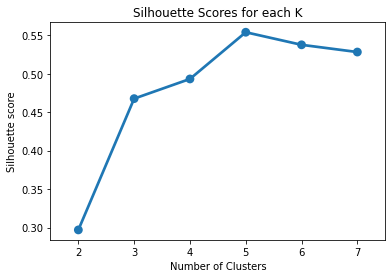

In [34]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Scores for each K')
plt.show()




## Client segmentation - 3 feature

In [35]:
df2 = df[['Spending Score (1-100)', 'Annual Income (k$)', 'Age']]
df2

,Spending Score (1-100),Annual Income (k$),Age
0,39,15,19
1,81,15,21
2,6,16,20
3,77,16,23
4,40,17,31
...,...,...,...
195,79,120,35
196,28,126,45
197,74,126,32
198,18,137,32


#### Elbow method

In [43]:
inertia = []
for n in range(1,10):
    algorithm = (KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter = 300, 
                        tol =0.0001, random_state = 111, algorithm = 'elkan'))
    algorithm.fit(df2)
    inertia.append(algorithm.inertia_) #Inertia measures how well a dataset was clustered by K-Means

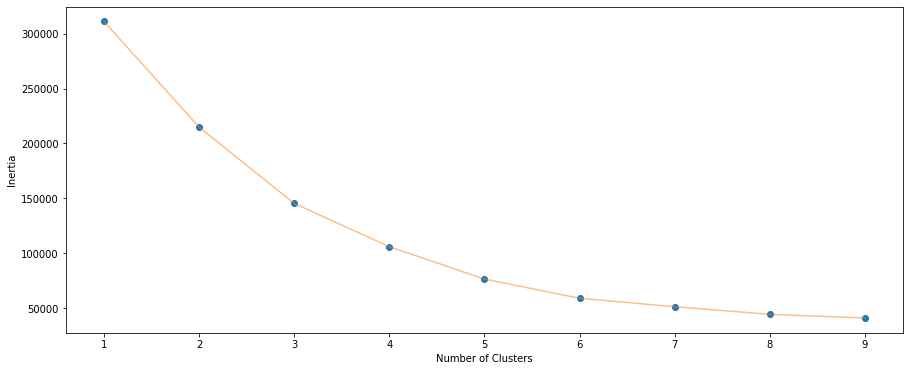

In [44]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,10), inertia, 'o')
plt.plot(np.arange(1,10), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### Applying KMeans for k = 4

In [45]:
model2 = KMeans(n_clusters = 5, init = 'k-means++', max_iter =1000)
model2.fit(df2)

KMeans(max_iter=1000, n_clusters=5)

In [46]:
df2['Cluster'] = algorithm.fit_predict(df2)

In [47]:
df2.head()

,Spending Score (1-100),Annual Income (k$),Age,Cluster,labels
0,39,15,19,3,8
1,81,15,21,5,0
2,6,16,20,3,4
3,77,16,23,5,0
4,40,17,31,3,8


### 3D visualization

In [48]:
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [49]:
df2['labels'] = labels

trace = go.Scatter3d(
                    x = df2['Age'],
                    y = df2['Annual Income (k$)'],
                    z = df2['Spending Score (1-100)'],
                    mode = 'markers',
                    marker = dict(color = df2['labels'], size = 5, line = dict(color = df2['labels'], width=12), opacity = 0.8)
                    )
data = [trace]
layout = go.Layout(title='Clusters', scene = dict(xaxis = dict(title= 'Age'), 
                                                  yaxis = dict(title='Annual Income (k$)'),
                                                  zaxis = dict(title = 'Spending Score (1-100)')
                                                 ))
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()